# Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import os
from shutil import copyfile

In [3]:
from neuralart.data import *

# Get Data

In [7]:
chan_csv_path = "../raw_data/wikiart/csv_chan"
chan_image_path= "../raw_data/wikiart/dataset_chan"
output_path = "../raw_data/wikiart"
dataset_dir_name = 'dataset'

In [8]:
data_full = get_data(chan_csv_path, chan_image_path, rm_image_duplicate=False)
data_full.shape

(81446, 10)

In [9]:
data = get_data(chan_csv_path, chan_image_path, rm_image_duplicate=True)
data.shape

(78748, 10)

In [10]:
merge_mov1={'name': 'merge_mov1',
            'merging':{'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': None,
                 'early_renaissance': 'early_renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'high_renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': None,
                 'northern_renaissance': 'northern_renaissance',
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}}

In [11]:
for n in [100,1000,None]:
    for s in ['drop','max']:
        for k in [False, True]:
            for c in [merge_mov1, None]:
                get_dataset(data, target="movement", class_=c, n=n, strategy=s, 
                            random_state=123, output_path=output_path, keep_genre=k )


In [12]:
create_dataset_directory(data_full, chan_image_path, output_path, dataset_dir_name)

2500 images copied
5000 images copied
7500 images copied
10000 images copied
12500 images copied
15000 images copied
17500 images copied
20000 images copied
22500 images copied
25000 images copied
27500 images copied
30000 images copied
32500 images copied
35000 images copied
37500 images copied
40000 images copied
42500 images copied
45000 images copied
47500 images copied
50000 images copied
52500 images copied
55000 images copied
57500 images copied
60000 images copied
62500 images copied
65000 images copied
67500 images copied
70000 images copied
72500 images copied
75000 images copied
77500 images copied
80000 images copied
Done: 81446 image(s) copied, 81446 image(s) in the folder


# Data Visualization

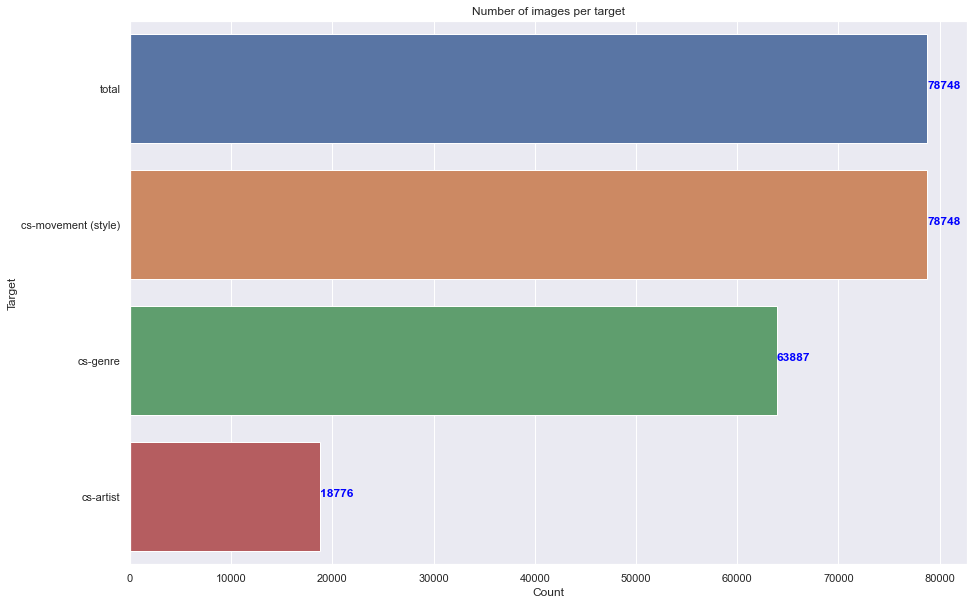

In [13]:
col = ['cs_split_artist','cs_split_genre','cs_split_style','cs_path']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].count().index, 
            x=data[col].count().values,
            order=data[col].count().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].count().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_yticklabels(['total','cs-movement (style)','cs-genre','cs-artist']);
ax.set_title("Number of images per target");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

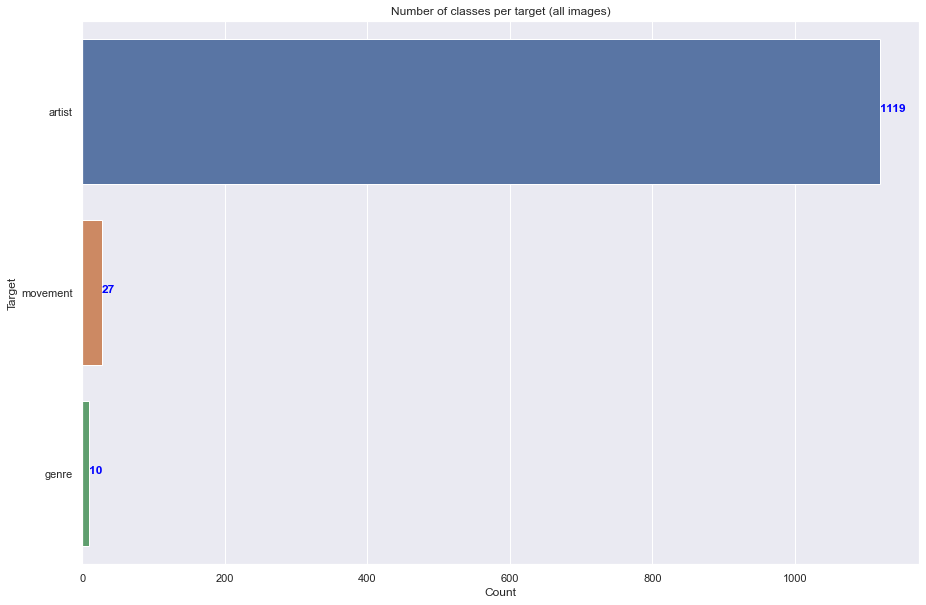

In [14]:
col = ['artist','genre','movement']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].nunique().index, 
            x=data[col].nunique().values,
            order=data[col].nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of classes per target (all images)");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

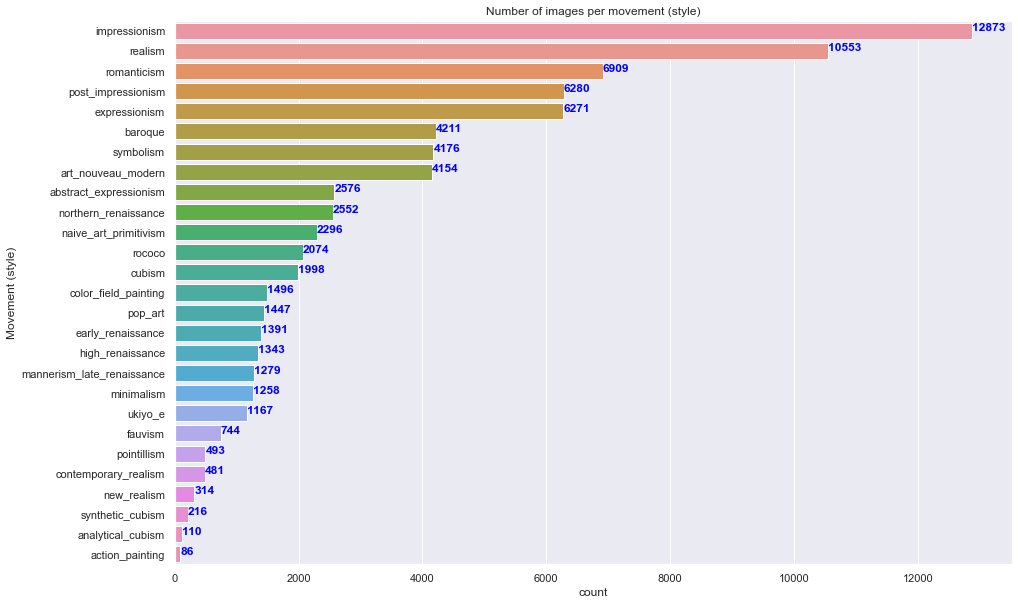

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="movement", 
              order = data['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per movement (style)");
ax.set_ylabel("Movement (style)");

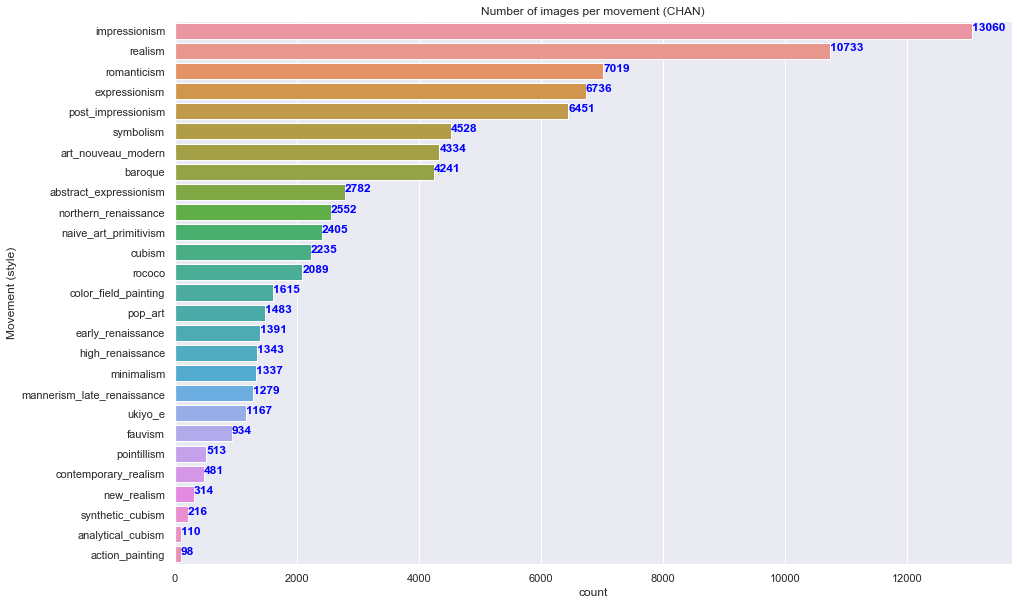

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data_full, y="movement", 
              order = data_full['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data_full["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per movement (CHAN)");
ax.set_ylabel("Movement (style)");

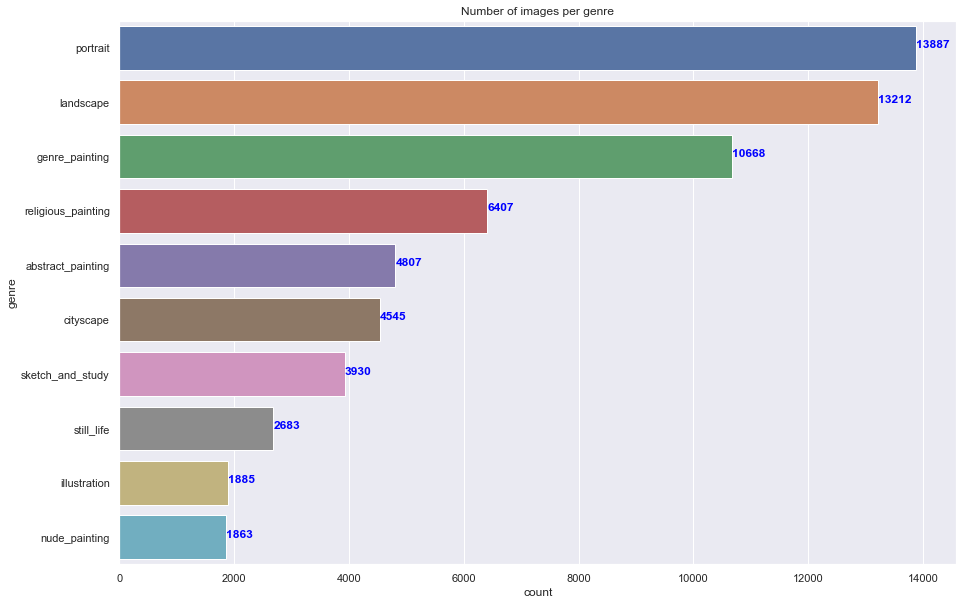

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="genre", 
              order = data['genre'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["genre"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per genre");

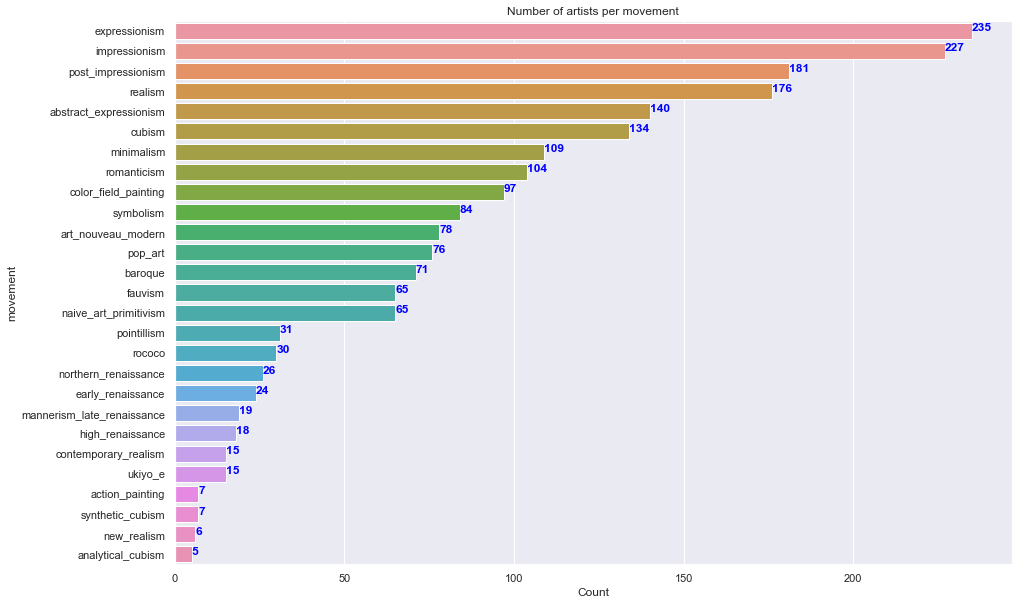

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.barplot(y=data.groupby("movement").artist.nunique().index, 
            x=data.groupby("movement").artist.nunique().values,
            order=data.groupby("movement").artist.nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data.groupby("movement").artist.nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of artists per movement");
ax.set_xlabel("Count");

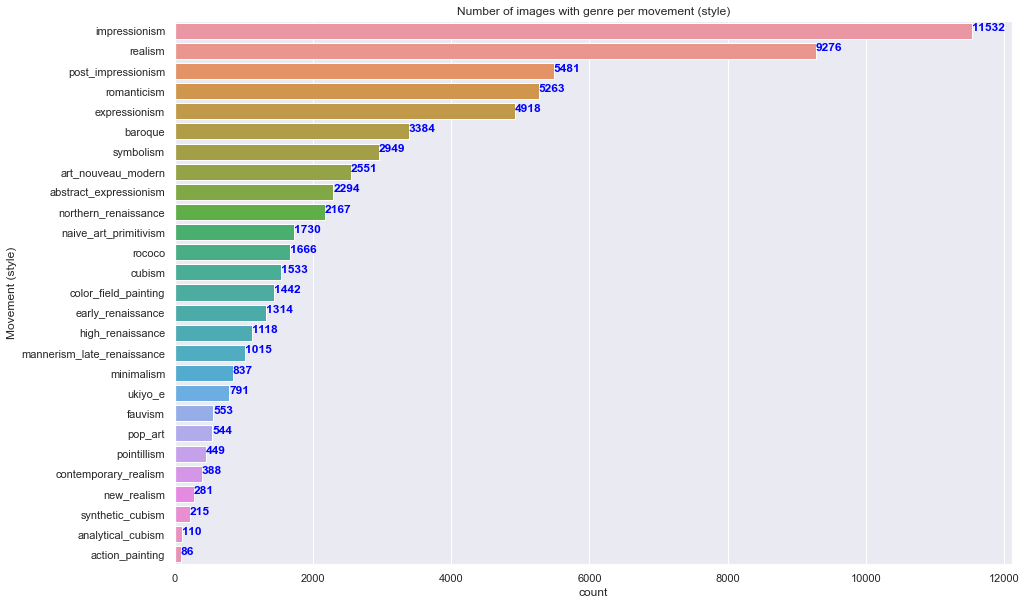

In [19]:
data2 = data[data["cs_split_genre"].notnull()]

fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data2, y="movement", 
              order = data2['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data2["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images with genre per movement (style)");
ax.set_ylabel("Movement (style)");

In [22]:
data[data["cs_split_genre"].notnull()][data["movement"]=="Abstract_Expressionism"].head(100)

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,cs_path,movement,artist,title,cs_file_name,file_name,genre,cs_split_genre,cs_split_style,cs_split_artist


In [184]:
#Quick function to display a sample of the selected database

def show_samples(df,sample_size=10):

    root_path='../raw_data/wikiart/dataset/'
    sample=df.sample(n=sample_size).reset_index()

    fig = plt.figure(constrained_layout=True,figsize=(10,5*sample_size))

    for i in list(range(0,sample_size)):
        artist=sample['artist'][i]
        movement=sample['movement'][i]
        title=sample['title'][i]
        path=root_path+sample['file_name'][i]

        plt.subplot(sample_size,1,i+1)
        image=plt.imread(path)
        label=f'{movement} - {title} by {artist}'
        plt.text(x=10,y=-2,s=label)
        plt.imshow(image)
        plt.axis("off")

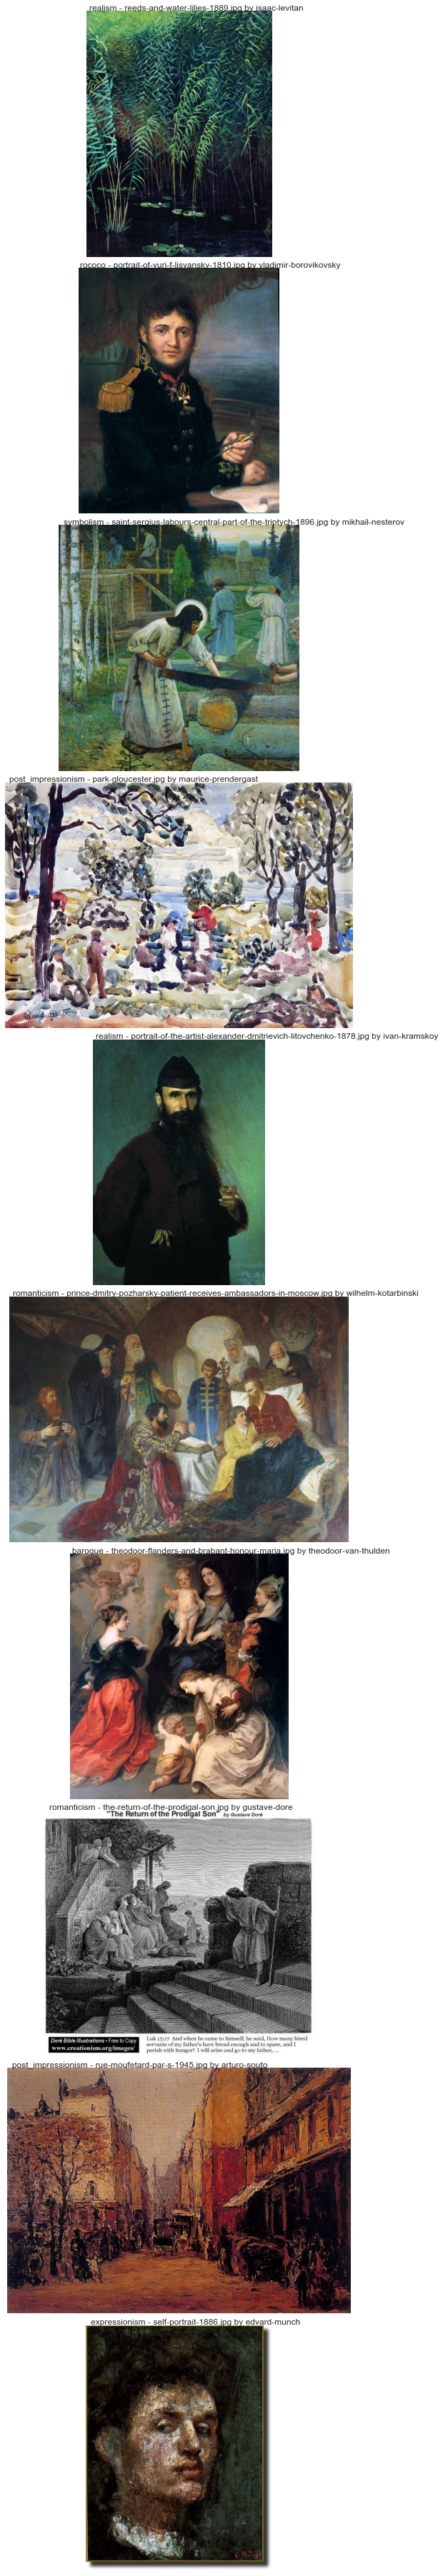

In [187]:
show_samples(df)

# Merge study

## Summary + initial database

**Final list of proposed splits :**

- Merge_test : merge_test : Modèle de test avec seulement 3 mouvements
- Merge1 : merge_mov1 : Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance 
- Merge2 : merge_mov2 : Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités 
- Merge3 : merge_mov3 : Modèle complet, merge d'une partie des mouvements droppés précédements , aucun drop hormis duplicatas de Chan
- Merge4 : merge_mov4 : Modèle initial, pas de merge, mouvements de la db de Chan
- Merge5 : merge_mov5 : Modèle plus complet, split sur les mouvements majoritaires par courant/école/nationalité des artistes

**Methodo :**

- General review of movements
- Basic split : movements regroupment / dropping

- Historical Detailed plits : dive into artists specific schools / periods / sub-movements ?
- Technical Detailed split : dive into images specificities ? color balances (could be synonymous of a period for an artist) ? painting format ?

**Database :**

- add regex to scan period min/max

In [66]:
import plotly.express as px

In [114]:
df=data.copy()
df.drop(columns=['cs_split_genre','cs_split_style','cs_split_artist'],inplace=True)

In [117]:
if df['title'].str.extract(r'([0-9]{4})') is not '':
    df['date']=df['title'].str.extract(r'([0-9]{4})').astype(float)

## Movements review

In [105]:
#General function to display synthesis table by movement from a specific dataframe

def df_grouping(df):
    df_mov=df.groupby(by='movement').nunique()
    df_mov['Q1_year']=df.groupby(by='movement').quantile(0.25)['date'].astype(int)
    df_mov['Q3_year']=df.groupby(by='movement').quantile(0.75)['date'].astype(int)
    df_mov['mean_year']=df.groupby(by='movement').mean()['date'].astype(int)
    df_mov['duration']=df_mov['Q3_year']-df_mov['Q1_year']
    df_mov['artist_ratio']=round(df_mov['title']/df_mov['artist'],2)
    df_mov.drop(columns=['cs_path','date'],inplace=True)
    df_mov.sort_values(['mean_year'])
    df_mov.reset_index(inplace=True)
    return df_mov

In [ ]:
#General function to check duplicates in titles and file_names

def title_duplicates(df,n=20,col_a='title',col_b='file_name'):
    col_a_duplicates=df[col_a].duplicated().sum()
    col_b_duplicates=df[col_b].duplicated().sum()
    duplicate_df=df[df[col_a].duplicated()].groupby(by=col_a).nunique()[col_b].sort_values(ascending=False).reset_index()
    df_out=duplicate_df.head(n)
    
    print(f'Found {col_a_duplicates} in {col_a} ; Found {col_b_duplicates} in {col_b}')
    return df_out

In [148]:
df_mov=df_grouping(df)
#Create dictionnaries to merge movements
mov_dict_init={ i : i for i in df_mov['movement'] }
mov_dict_init

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



{'abstract_expressionism': 'abstract_expressionism',
 'action_painting': 'action_painting',
 'analytical_cubism': 'analytical_cubism',
 'art_nouveau_modern': 'art_nouveau_modern',
 'baroque': 'baroque',
 'color_field_painting': 'color_field_painting',
 'contemporary_realism': 'contemporary_realism',
 'cubism': 'cubism',
 'early_renaissance': 'early_renaissance',
 'expressionism': 'expressionism',
 'fauvism': 'fauvism',
 'high_renaissance': 'high_renaissance',
 'impressionism': 'impressionism',
 'mannerism_late_renaissance': 'mannerism_late_renaissance',
 'minimalism': 'minimalism',
 'naive_art_primitivism': 'naive_art_primitivism',
 'new_realism': 'new_realism',
 'northern_renaissance': 'northern_renaissance',
 'pointillism': 'pointillism',
 'pop_art': 'pop_art',
 'post_impressionism': 'post_impressionism',
 'realism': 'realism',
 'rococo': 'rococo',
 'romanticism': 'romanticism',
 'symbolism': 'symbolism',
 'synthetic_cubism': 'synthetic_cubism',
 'ukiyo_e': 'ukiyo_e'}

In [149]:
#Print original movements
fig =px.scatter(df_mov,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig.update_traces(textposition='top center')
fig.update_layout(title='Movements Initial Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig.show()

##### TO DO

Add analysis from country origin by artists or even more detailed artist data

## Basic splits

**Merge_test :** 

Modèle de test avec seulement 3 mouvements bien distincts et une bonne taille de dataset :


In [150]:
merge_test={'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': None,
                 'baroque': None,
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': 'cubism',
                 'early_renaissance': None,
                 'expressionism': None,
                 'fauvism': None,
                 'high_renaissance': None,
                 'impressionism': None,
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': None,
                 'new_realism': None,
                 'northern_renaissance': None,
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': None,
                 'realism': None,
                 'rococo': None,
                 'romanticism': None,
                 'symbolism': None,
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}
df_mov_test=df_grouping(df.replace(merge_test.keys(),merge_test.values()))
df_mov_test.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(3, 11)

In [151]:
fig_test =px.scatter(df_mov_test,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig_test.update_traces(textposition='top center')
fig_test.update_layout(title='Movements Merge_Test Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig_test.show()

**Merge1 :** 

Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance :
- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio élevé : plus d'exemples par artistes pour fitter drop si <25
- merge unique :
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']

In [100]:
merge_mov1={'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': None,
                 'northern_renaissance': 'renaissance',
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}
df_mov1=df_grouping(df.replace(merge_mov1.keys(),merge_mov1.values()))
df_mov1.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(14, 11)

In [89]:
fig1 =px.scatter(df_mov1,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig1.update_traces(textposition='top center')
fig1.update_layout(title='Movements Merge1 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig1.show()

**Merge2 :**

Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités :

- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio modéré: plus d'exemples par artistes pour fitter drop si <15
- Merging des mouvements sous représentés par proximité
        Abstract=['Abstract_Expressionism','Action_painting']
        Cubism=['Analytical_Cubism','Cubism','Synthetic_Cubism']
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']
        New_Realism=['Contemporary_Realism','New_Realism']

In [95]:

merge_mov2={'abstract_expressionism': 'abstract',
                 'action_painting': 'abstract',
                 'analytical_cubism': 'cubism',
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': 'new_realism',
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': 'new_realism',
                 'northern_renaissance': 'renaissance',
                 'pointillism': None,
                 'pop_art': 'pop_art',
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': 'cubism',
                 'ukiyo_e': 'ukiyo_e'}
df_mov2=df_grouping(df.replace(merge_mov2.keys(),merge_mov2.values()))
df_mov2.shape


/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(17, 11)

In [96]:
fig2 =px.scatter(df_mov2,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig2.update_traces(textposition='top center')
fig2.update_layout(title='Movements Merge2 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig2.show()

**Merge3 :**

Modèle complet, merge d'une partie des mouvements droppés précédements , auncun drop hormis duplicatas de Chan:

    - Merge des mouvements à taille limitée (<500 oeuvres) selon la même méthodo que le Merge2
    - Mouvements majeur (impressionisme / realisme / Romantisme) : pas de split par auteurs/écoles/pays

In [98]:

merge_mov3={'abstract_expressionism': 'abstract',
                 'action_painting': 'abstract',
                 'analytical_cubism': 'cubism',
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': 'color_field_painting',
                 'contemporary_realism': 'new_realism',
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': 'fauvism',
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': 'minimalism',
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': 'new_realism',
                 'northern_renaissance': 'renaissance',
                 'pointillism': 'pointillism',
                 'pop_art': 'pop_art',
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': 'cubism',
                 'ukiyo_e': 'ukiyo_e'}
df_mov3=df_grouping(df.replace(merge_mov3.keys(),merge_mov3.values()))
df_mov3.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(21, 11)

In [99]:
fig3 =px.scatter(df_mov3,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig3.update_traces(textposition='top center')
fig3.update_layout(title='Movements Merge3 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig3.show()

## By Artist

- check artist vs movement (identification by artist ?)
- does an artist have several movements ?
- check Impressionism split by artists

In [59]:
df_artist=data_full.groupby(by='artist').nunique()
df_artist.head()


df_impr=data_full[data_full.movement.isin(['Impressionism'])]

df_impr.describe()

,cs_path,movement,artist,title,cs_file_name,file_name,genre,cs_split_genre,cs_split_style,cs_split_artist
count,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
